<a href="https://colab.research.google.com/github/KirillSmirnov2/InnopolisStudentPublicRepository/blob/main/CH3_HW_1_SmirnovKK%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Глава 3 Домашнее задание 1

---







1.  Использовать любой датафрейм для решения задачи машинного обучения: классификации или регрессии. Выберите целевой признак самостоятельно. Обучите модель, сделайте предсказание, оцените качество модели

2. Загрузить любой датафрейм в Dask. Выполнить 5-7 любых действий с датафреймом (группировка, построение графиков, и т.д.).


---
# Задача 1
 Использовать любой датафрейм для решения задачи машинного обучения: классификации или регрессии. Выберите целевой признак самостоятельно. Обучите модель, сделайте предсказание, оцените качество модели

https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

---

In [1]:
import numpy as np
import pandas as pd
import math
import scipy
import time
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from itertools import filterfalse
from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from sklearn.tree import plot_tree
import random



In [2]:
data_0=pd.read_csv('heart_2020_cleaned.csv')

In [3]:
# @title Используем команды '.info()'  и  '.describe()' для получение информации о датасете.
data_0.info()
data_0.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [4]:
# @title Проверка нулевых строк
data_0.isnull().describe()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795
unique,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795


In [5]:
# @title Дубликаты убираем
data_00=data_0.loc[data_0.duplicated() == False]
print(data_00)

       HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0                No  16.60     Yes              No     No             3.0   
1                No  20.34      No              No    Yes             0.0   
2                No  26.58     Yes              No     No            20.0   
3                No  24.21      No              No     No             0.0   
4                No  23.71      No              No     No            28.0   
...             ...    ...     ...             ...    ...             ...   
319790          Yes  27.41     Yes              No     No             7.0   
319791           No  29.84     Yes              No     No             0.0   
319792           No  24.24      No              No     No             0.0   
319793           No  32.81      No              No     No             0.0   
319794           No  46.56      No              No     No             0.0   

        MentalHealth DiffWalking     Sex  AgeCategory      Race Diabetic  \

In [6]:
# @title Определяем чем заполнен dataframe
print('HeartDisease        : ',set(data_00['HeartDisease'].tolist()))
print('BMI                 : ', len(set(data_00['BMI'].tolist())))
print('Smoking             : ',set(data_00['Smoking'].tolist()))
print('AlcoholDrinking     : ',set(data_00['AlcoholDrinking'].tolist()))
print('Stroke              : ',set(data_00['Stroke'].tolist()))
print('PhysicalHealth      : ',set(data_00['PhysicalHealth'].tolist()))
print('MentalHealth        : ',set(data_00['MentalHealth'].tolist()))
print('DiffWalking         : ',set(data_00['DiffWalking'].tolist()))
print('Sex                 : ',set(data_00['Sex'].tolist()))
print('AgeCategory         : ',set(data_00['AgeCategory'].tolist()))
print('Race                : ',set(data_00['Race'].tolist()))
print('Diabetic            : ',set(data_00['Diabetic'].tolist()))
print('PhysicalActivity    : ',set(data_00['PhysicalActivity'].tolist()))
print('GenHealth           : ',set(data_00['GenHealth'].tolist()))
print('SleepTime           : ',set(data_00['SleepTime'].tolist()))
print('Asthma              : ',set(data_00['Asthma'].tolist()))
print('KidneyDisease       : ',set(data_00['KidneyDisease'].tolist()))
print('SkinCancer          : ',set(data_00['SkinCancer'].tolist()))

HeartDisease        :  {'Yes', 'No'}
BMI                 :  3604
Smoking             :  {'Yes', 'No'}
AlcoholDrinking     :  {'Yes', 'No'}
Stroke              :  {'Yes', 'No'}
PhysicalHealth      :  {0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0}
MentalHealth        :  {0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0}
DiffWalking         :  {'Yes', 'No'}
Sex                 :  {'Male', 'Female'}
AgeCategory         :  {'60-64', '65-69', '70-74', '18-24', '80 or older', '40-44', '30-34', '25-29', '50-54', '55-59', '35-39', '75-79', '45-49'}
Race                :  {'White', 'Asian', 'American Indian/Alaskan Native', 'Other', 'Black', 'Hispanic'}
Diabetic            :  {'Yes (during pregnancy)', 'Yes', 'No', 'No, borderline diabetes'}
Ph

<Axes: xlabel='SleepTime', ylabel='Count'>

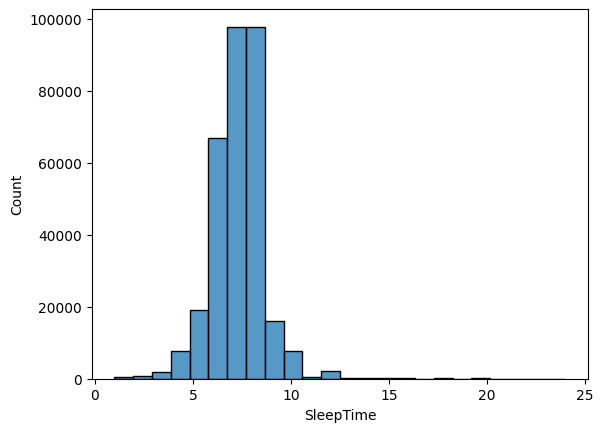

In [7]:
# @title Посмотрим  продолжительности сна - убрать слишком крайние
sns.histplot(data_0['SleepTime'], bins=24, kde=False)

<Axes: xlabel='BMI', ylabel='Count'>

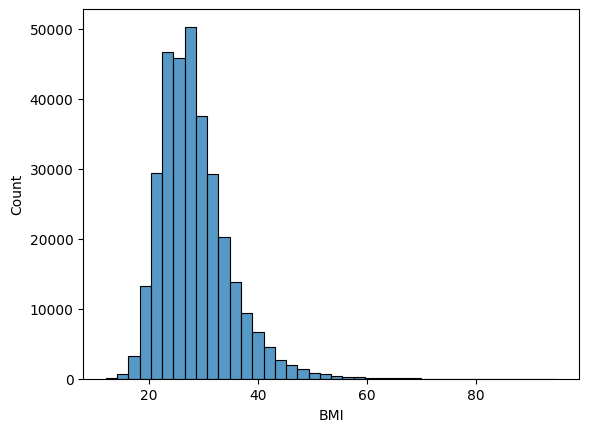

In [8]:
# @title Индекс массы тела - данные хорошие
sns.histplot(data_0['BMI'], bins=40, kde=False)

<Axes: xlabel='MentalHealth', ylabel='Count'>

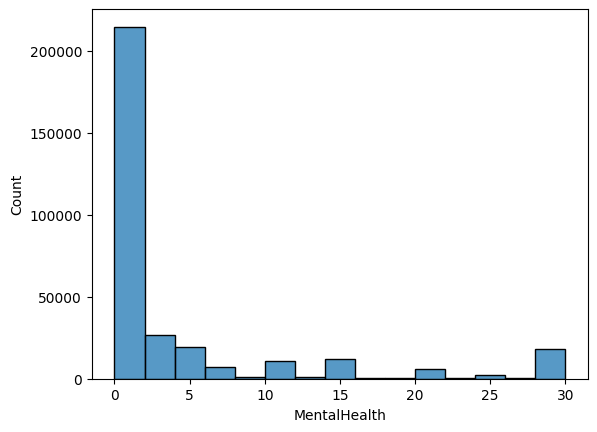

In [9]:
# @title "Ментальное здоровье" - непонятно. К удалению
sns.histplot(data_0['MentalHealth'], bins=15, kde=False)

<Axes: xlabel='PhysicalHealth', ylabel='Count'>

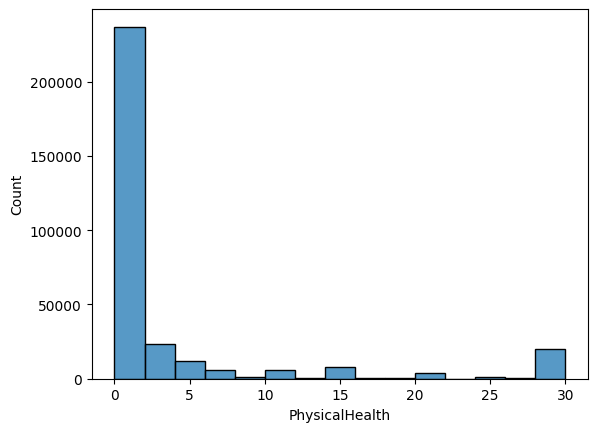

In [10]:
# @title "Физическое здоровье" - непонятно. К удалению
sns.histplot(data_0['PhysicalHealth'], bins=15, kde=False)

<Axes: xlabel='AgeCategory', ylabel='Count'>

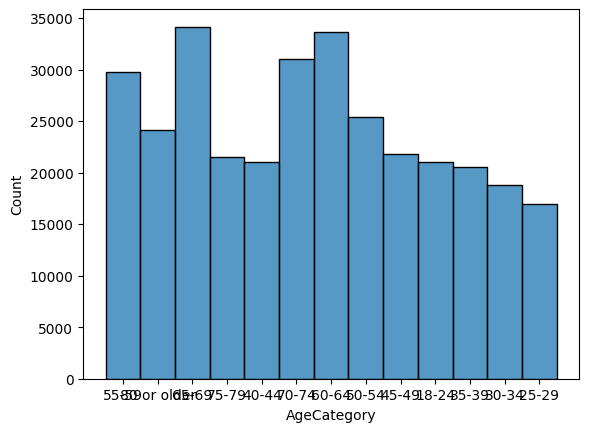

In [11]:
# @title "Возрастные категории" - данные можно использовать
sns.histplot(data_0['AgeCategory'])

<Axes: xlabel='Race', ylabel='Count'>

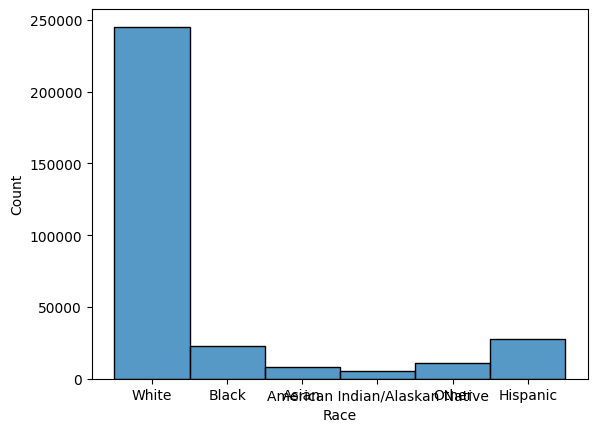

In [12]:
# @title "Происхождение" - данные трудно применить, к удалению
sns.histplot(data_0['Race'])

<Axes: xlabel='GenHealth', ylabel='Count'>

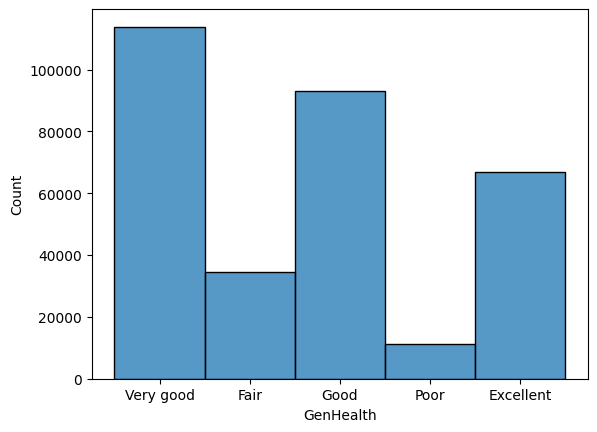

In [13]:
# @title "Самочувствие" - данные трудно применить и субъективное, к удалению
sns.histplot(data_0['GenHealth'])

<Axes: xlabel='Sex', ylabel='Count'>

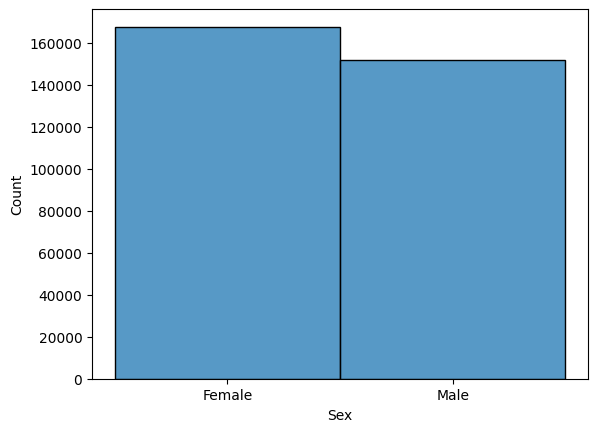

In [14]:
# @title "Пол" - логичные данные но и не помогут в работе, к удалению.
sns.histplot(data_0['Sex'])

<Axes: xlabel='DiffWalking', ylabel='Count'>

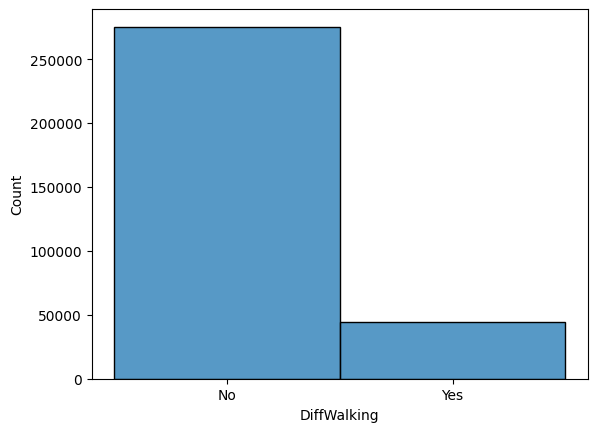

In [15]:
# @title "Трудность ходить" - в основном это опорно-двигательный аппарат - уберем из анализа, к удалению
sns.histplot(data_0['DiffWalking'])

<Axes: xlabel='Diabetic', ylabel='Count'>

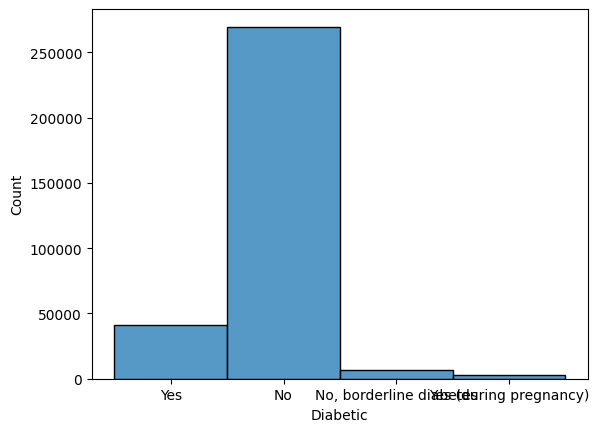

In [16]:
# @title "Диабет" - [ Yes (during pregnancy) - запишем в NO ;  'No, borderline diabetes' - запишем в  YES ]
sns.histplot(data_0['Diabetic'])

In [17]:
# @title Оставим в анализе только тех кто спит от 4 до 13 часов, уберем столбцы к удалению,
data_01=data_00.loc[data_00['SleepTime'] < 15]
del data_01['PhysicalHealth']
del data_01['MentalHealth']
del data_01['DiffWalking']
del data_01['GenHealth']
del data_01['Sex']
del data_01['Race']

data_01.AlcoholDrinking.replace(to_replace=dict(Yes=1, No=0), inplace=True)
data_01.Smoking.replace(to_replace=dict(Yes=1, No=0), inplace=True)
data_01.Stroke.replace(to_replace=dict(Yes=1, No=0), inplace=True)
#data_01.DiffWalking.replace(to_replace=dict(Yes=1, No=0), inplace=True)
#data_01.Diabetic.replace(to_replace=dict('Yes'=1, 'No'=0, 'No, borderline diabetes' = 1 , 'Yes (during pregnancy)' =0 ), inplace=True)

data_01.Diabetic[data_01.Diabetic == 'Yes'] = 1
data_01.Diabetic[data_01.Diabetic == 'No'] = 0
data_01.Diabetic[data_01.Diabetic == 'No, borderline diabetes'] = 1
data_01.Diabetic[data_01.Diabetic == 'Yes (during pregnancy)'] = 0
data_01.Diabetic=pd.to_numeric(data_01.Diabetic)
#df["a"] = pd.to_numeric(df["a"])

data_01.PhysicalActivity.replace(to_replace=dict(Yes=1, No=0), inplace=True)
data_01.Asthma.replace(to_replace=dict(Yes=1, No=0), inplace=True)
data_01.KidneyDisease .replace(to_replace=dict(Yes=1, No=0), inplace=True)
data_01.SkinCancer.replace(to_replace=dict(Yes=1, No=0), inplace=True)
#data_01.Sex.replace(to_replace=dict(Male=1, Female=0), inplace=True)
data_01.HeartDisease.replace(to_replace=dict(Yes=1, No=0), inplace=True)

data_1=data_01.loc[data_00['SleepTime'] > 3]
del data_01


<ipython-input-17-aab434f81577>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_01.AlcoholDrinking.replace(to_replace=dict(Yes=1, No=0), inplace=True)
<ipython-input-17-aab434f81577>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_01.Smoking.replace(to_replace=dict(Yes=1, No=0), inplace=True)
<ipython-input-17-aab434f81577>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_01.Stroke.replace(to_replace=dict(Yes=1, No=

In [18]:
data_1.info()
data_1.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297727 entries, 0 to 319794
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      297727 non-null  int64  
 1   BMI               297727 non-null  float64
 2   Smoking           297727 non-null  int64  
 3   AlcoholDrinking   297727 non-null  int64  
 4   Stroke            297727 non-null  int64  
 5   AgeCategory       297727 non-null  object 
 6   Diabetic          297727 non-null  int64  
 7   PhysicalActivity  297727 non-null  int64  
 8   SleepTime         297727 non-null  float64
 9   Asthma            297727 non-null  int64  
 10  KidneyDisease     297727 non-null  int64  
 11  SkinCancer        297727 non-null  int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 29.5+ MB


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,Diabetic,PhysicalActivity,SleepTime,Asthma,KidneyDisease,SkinCancer
count,297727.000000,297727.000000,297727.000000,297727.000000,297727.000000,297727.000000,297727.00000,297727.000000,297727.000000,297727.000000,297727.000000
mean,0.089407,28.428632,0.421023,0.071448,0.039227,0.155790,0.76551,7.114770,0.140169,0.038475,0.097307
std,0.285331,6.446365,0.493724,0.257572,0.194135,0.362657,0.42368,1.305596,0.347163,0.192340,0.296376
min,0.000000,12.020000,0.000000,0.000000,0.000000,0.000000,0.00000,4.000000,0.000000,0.000000,0.000000
25%,0.000000,24.030000,0.000000,0.000000,0.000000,0.000000,1.00000,6.000000,0.000000,0.000000,0.000000
50%,0.000000,27.400000,0.000000,0.000000,0.000000,0.000000,1.00000,7.000000,0.000000,0.000000,0.000000
75%,0.000000,31.630000,1.000000,0.000000,0.000000,0.000000,1.00000,8.000000,0.000000,0.000000,0.000000
max,1.000000,94.850000,1.000000,1.000000,1.000000,1.000000,1.00000,14.000000,1.000000,1.000000,1.000000


In [19]:
print(data_1)

        HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  AgeCategory  \
0                  0  16.60        1                0       0        55-59   
1                  0  20.34        0                0       1  80 or older   
2                  0  26.58        1                0       0        65-69   
3                  0  24.21        0                0       0        75-79   
4                  0  23.71        0                0       0        40-44   
...              ...    ...      ...              ...     ...          ...   
319790             1  27.41        1                0       0        60-64   
319791             0  29.84        1                0       0        35-39   
319792             0  24.24        0                0       0        45-49   
319793             0  32.81        0                0       0        25-29   
319794             0  46.56        0                0       0  80 or older   

        Diabetic  PhysicalActivity  SleepTime  Asthma  KidneyDi

In [20]:
# @title Форма группировки
#print('' , data_1.loc[data_1('')])
grouped = data_1.groupby(['AgeCategory', 'HeartDisease'])['BMI'].mean()
print(grouped)
#.groupby(['Brand','VehicleType'])['Price']

AgeCategory  HeartDisease
18-24        0               25.843720
             1               25.901322
25-29        0               27.766183
             1               28.239219
30-34        0               28.506041
             1               29.989032
35-39        0               28.932310
             1               30.396904
40-44        0               29.269761
             1               31.891947
45-49        0               29.514804
             1               32.352539
50-54        0               29.455577
             1               31.459909
55-59        0               29.109166
             1               30.932519
60-64        0               28.783015
             1               30.616490
65-69        0               28.628255
             1               30.217185
70-74        0               28.062140
             1               29.385008
75-79        0               27.434869
             1               28.604984
80 or older  0               26.067520

In [21]:
# @title Дамми-ловушка для "AgeCategory"
dataT=pd.get_dummies(data_1, drop_first=True)
print(dataT)

        HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  Diabetic  \
0                  0  16.60        1                0       0         1   
1                  0  20.34        0                0       1         0   
2                  0  26.58        1                0       0         1   
3                  0  24.21        0                0       0         0   
4                  0  23.71        0                0       0         0   
...              ...    ...      ...              ...     ...       ...   
319790             1  27.41        1                0       0         1   
319791             0  29.84        1                0       0         0   
319792             0  24.24        0                0       0         0   
319793             0  32.81        0                0       0         0   
319794             0  46.56        0                0       0         0   

        PhysicalActivity  SleepTime  Asthma  KidneyDisease  ...  \
0                      1        

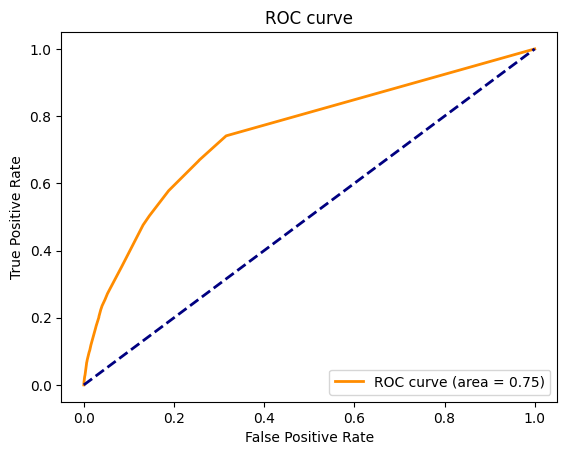

In [22]:
# @title Схема по "HeartDisease"
features= dataT.drop(['HeartDisease'], axis = 1)
target = dataT['HeartDisease']
X = features
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)
clf = DecisionTreeClassifier(max_depth = 5)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy_score(y_test,y_pred)

f1_score(y_test, y_pred)

from sklearn.metrics import  roc_curve, auc
probability = clf.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, probability)
roc_auc=auc(fpr, tpr)
roc_auc


import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color = 'darkorange', lw=2, label ='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw=2, linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc= 'lower right')


In [23]:
# @title показатели схемы по "HeartDisease"
print(y_train.value_counts()[1]/y_train.value_counts()[0])
print(y_test.value_counts()[1]/y_test.value_counts()[0])
print('f1_score      :  ',f1_score(y_test, y_pred))
print('accuracy_score:  ',accuracy_score(y_test,y_pred))

#print('predict        :  ',clf.predict(X_test))
#print('predict_proba  :  ',clf.predict_proba(X_test))
#print('score          :  ',clf.score(X_test, y_test))

0.09865481883844049
0.09678179889190144
f1_score      :   0.048617176128093166
accuracy_score:   0.9121883061049011


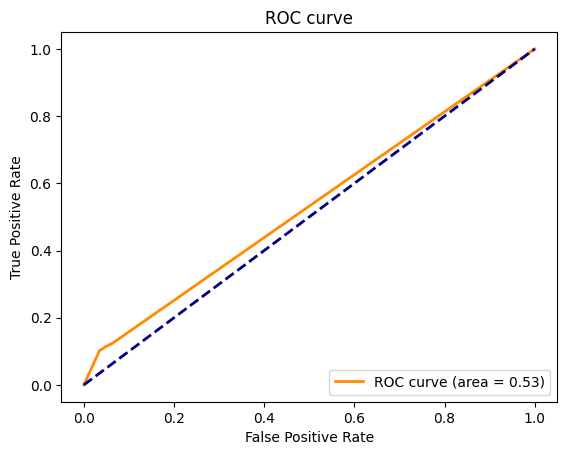

In [24]:
# @title Схема по "Stroke"
features= dataT.drop(['Stroke'], axis = 1)
target = dataT['Stroke']
X = features
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy_score(y_test,y_pred)

f1_score(y_test, y_pred)

from sklearn.metrics import  roc_curve, auc
probability = clf.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, probability)
roc_auc=auc(fpr, tpr)
roc_auc


import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color = 'darkorange', lw=2, label ='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw=2, linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc= 'lower right')


In [25]:
# @title показатели схемы по "Stroke"
print(y_train.value_counts()[1]/y_train.value_counts()[0])
print(y_test.value_counts()[1]/y_test.value_counts()[0])
print('f1_score      :  ',f1_score(y_test, y_pred))
print('accuracy_score:  ',accuracy_score(y_test,y_pred))

0.04106542587662656
0.040119618227805645
f1_score      :   0.10407876230661041
accuracy_score:   0.9315348237317282


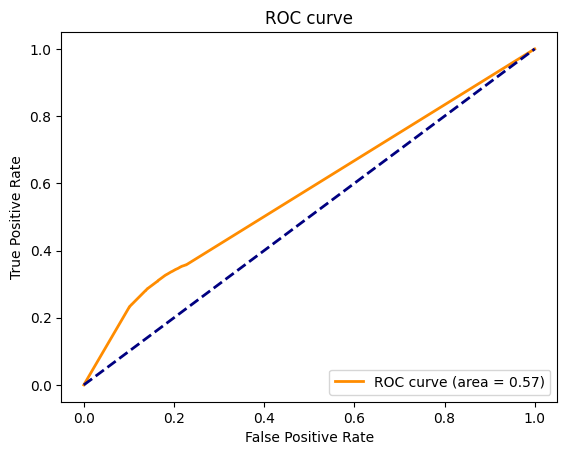

In [26]:
# @title Схема по "Diabetic"
features= dataT.drop(['Diabetic'], axis = 1)
target = dataT['Diabetic']
X = features
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy_score(y_test,y_pred)

f1_score(y_test, y_pred)

from sklearn.metrics import  roc_curve, auc
probability = clf.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, probability)
roc_auc=auc(fpr, tpr)
roc_auc


import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color = 'darkorange', lw=2, label ='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw=2, linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc= 'lower right')


In [27]:
# @title показатели схемы по "Diabetic"
print(y_train.value_counts()[1]/y_train.value_counts()[0])
print(y_test.value_counts()[1]/y_test.value_counts()[0])
print('f1_score      :  ',f1_score(y_test, y_pred))
print('accuracy_score:  ',accuracy_score(y_test,y_pred))

0.18446318692976874
0.18477015153444543
f1_score      :   0.263346214398168
accuracy_score:   0.7925489036973344


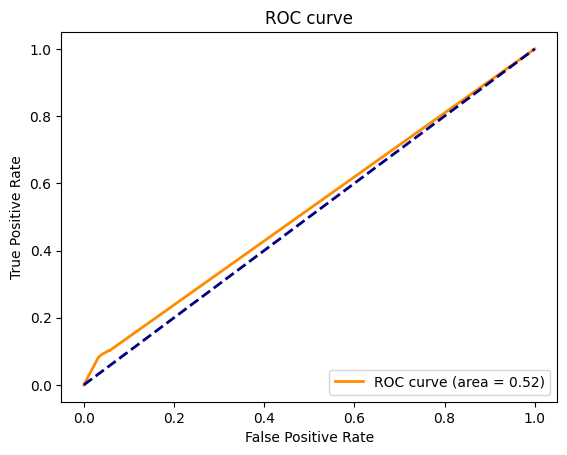

In [28]:
# @title Схема по "KidneyDisease"
features= dataT.drop(['KidneyDisease'], axis = 1)
target = dataT['KidneyDisease']
X = features
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy_score(y_test,y_pred)

f1_score(y_test, y_pred)

from sklearn.metrics import  roc_curve, auc
probability = clf.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, probability)
roc_auc=auc(fpr, tpr)
roc_auc


import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color = 'darkorange', lw=2, label ='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw=2, linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc= 'lower right')


In [29]:
# @title показатели схемы по "KidneyDisease"
print(y_train.value_counts()[1]/y_train.value_counts()[0])
print(y_test.value_counts()[1]/y_test.value_counts()[0])
print('f1_score      :  ',f1_score(y_test, y_pred))
print('accuracy_score:  ',accuracy_score(y_test,y_pred))

0.04012465006218529
0.039683759131734435
f1_score      :   0.08611729769858946
accuracy_score:   0.9338456577815993


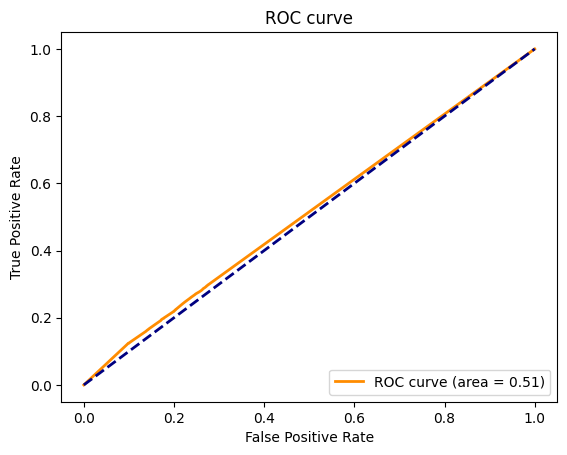

In [30]:
# @title Схема по "Asthma"
features= dataT.drop(['Asthma'], axis = 1)
target = dataT['Asthma']
X = features
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy_score(y_test,y_pred)

f1_score(y_test, y_pred)

from sklearn.metrics import  roc_curve, auc
probability = clf.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, probability)
roc_auc=auc(fpr, tpr)
roc_auc


import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color = 'darkorange', lw=2, label ='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw=2, linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc= 'lower right')


In [31]:
# @title показатели схемы по "Asthma"
print(y_train.value_counts()[1]/y_train.value_counts()[0])
print(y_test.value_counts()[1]/y_test.value_counts()[0])
print('f1_score      :  ',f1_score(y_test, y_pred))
print('accuracy_score:  ',accuracy_score(y_test,y_pred))

0.16276466116081192
0.16378191597479558
f1_score      :   0.1438469152095018
accuracy_score:   0.7908157781599312


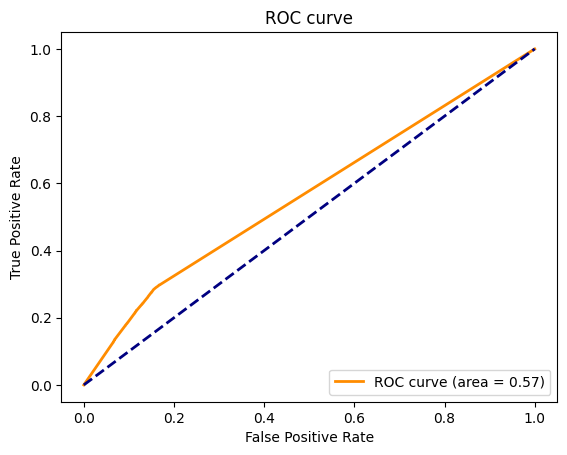

In [32]:
# @title Схема по "SkinCancer"
features= dataT.drop(['SkinCancer'], axis = 1)
target = dataT['SkinCancer']
X = features
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy_score(y_test,y_pred)

f1_score(y_test, y_pred)

from sklearn.metrics import  roc_curve, auc
probability = clf.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, probability)
roc_auc=auc(fpr, tpr)
roc_auc


import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color = 'darkorange', lw=2, label ='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw=2, linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc= 'lower right')


In [33]:
# @title показатели схемы по "SkinCancer"
print(y_train.value_counts()[1]/y_train.value_counts()[0])
print(y_test.value_counts()[1]/y_test.value_counts()[0])
print('f1_score      :  ',f1_score(y_test, y_pred))
print('accuracy_score:  ',accuracy_score(y_test,y_pred))

0.10765804198579308
0.10821273301173248
f1_score      :   0.1525265127885215
accuracy_score:   0.853987532244196


**Выводы: Данные датасета плохо поддаются машинному обучению, относительно лучше импользовать по параметрам: [SkinCancer] , [Diabetic] , [HeartDisease] **

---
# Задача 2
   Загрузить любой датафрейм в Dask. Выполнить 5-7 любых действий с датафреймом (группировка, построение графиков, и т.д.).

https://www.kaggle.com/datasets/kaggleprollc/healthcare-patient-satisfaction-data-collection
---

In [34]:
from dask.distributed import Client
import dask.dataframe as dd


In [35]:
# @title Загрузка в Dask данных
df_01=pd.read_csv('cms_hospital_patient_satisfaction_2019.csv')
df_02=pd.read_csv('cms_hospital_patient_satisfaction_2020.csv')
ddf_01=dd.from_pandas(df_01 , npartitions = 8 )
ddf_02=dd.from_pandas(df_02 , npartitions = 8 )
ddf_01.compute()
ddf_02.compute()

<ipython-input-35-8ee909deed97>:2: DtypeWarning: Columns (14,17,19,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df_01=pd.read_csv('cms_hospital_patient_satisfaction_2019.csv')
<ipython-input-35-8ee909deed97>:3: DtypeWarning: Columns (0,14,17,19,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df_02=pd.read_csv('cms_hospital_patient_satisfaction_2020.csv')


,Facility ID,Facility Name,Address,City,State,ZIP Code,County Name,Phone Number,HCAHPS Measure ID,HCAHPS Question,...,Readmission national comparison,Readmission national comparison footnote,Patient experience national comparison,Patient experience national comparison footnote,Effectiveness of care national comparison,Effectiveness of care national comparison footnote,Timeliness of care national comparison,Timeliness of care national comparison footnote,Efficient use of medical imaging national comparison,Efficient use of medical imaging national comparison footnote
0,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,H_COMP_1_A_P,"Patients who reported that their nurses ""Alway...",...,Below the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN
1,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,H_COMP_1_SN_P,"Patients who reported that their nurses ""Somet...",...,Below the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN
2,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,H_COMP_1_U_P,"Patients who reported that their nurses ""Usual...",...,Below the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN
3,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,H_COMP_1_LINEAR_SCORE,Nurse communication - linear mean score,...,Below the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN
4,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,H_COMP_1_STAR_RATING,Nurse communication - star rating,...,Below the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442582,670130,SOUTHCROSS HOSPITAL,4243 EAST SOUTHCROSS BLVD SUITE 100,SAN ANTONIO,TX,78222,BEXAR,(210) 507-4392,H_RECMND_DY,"Patients who reported YES, they would definite...",...,Not Available,19.0,Not Available,19.0,Not Available,19.0,Not Available,19.0,Not Available,19.0
442583,670130,SOUTHCROSS HOSPITAL,4243 EAST SOUTHCROSS BLVD SUITE 100,SAN ANTONIO,TX,78222,BEXAR,(210) 507-4392,H_RECMND_PY,"Patients who reported YES, they would probably...",...,Not Available,19.0,Not Available,19.0,Not Available,19.0,Not Available,19.0,Not Available,19.0
442584,670130,SOUTHCROSS HOSPITAL,4243 EAST SOUTHCROSS BLVD SUITE 100,SAN ANTONIO,TX,78222,BEXAR,(210) 507-4392,H_RECMND_LINEAR_SCORE,Recommend hospital - linear mean score,...,Not Available,19.0,Not Available,19.0,Not Available,19.0,Not Available,19.0,Not Available,19.0
442585,670130,SOUTHCROSS HOSPITAL,4243 EAST SOUTHCROSS BLVD SUITE 100,SAN ANTONIO,TX,78222,BEXAR,(210) 507-4392,H_RECMND_STAR_RATING,Recommend hospital - star rating,...,Not Available,19.0,Not Available,19.0,Not Available,19.0,Not Available,19.0,Not Available,19.0


In [36]:
ddf_01.info()


<class 'dask.dataframe.core.DataFrame'>
Columns: 43 entries, Facility ID to Efficient use of medical imaging national comparison footnote
dtypes: object(31), float64(9), int64(3)

In [37]:
ddf_02.info()

<class 'dask.dataframe.core.DataFrame'>
Columns: 43 entries, Facility ID to Efficient use of medical imaging national comparison footnote
dtypes: object(32), float64(9), int64(2)

In [38]:
# @title №1 Обьъединим два Датафрейма
ddf_00=dd.concat([ddf_01, ddf_02])

In [39]:
ddf_00.compute()

,Facility ID,Facility Name,Address,City,State,ZIP Code,County Name,Phone Number,HCAHPS Measure ID,HCAHPS Question,...,Readmission national comparison,Readmission national comparison footnote,Patient experience national comparison,Patient experience national comparison footnote,Effectiveness of care national comparison,Effectiveness of care national comparison footnote,Timeliness of care national comparison,Timeliness of care national comparison footnote,Efficient use of medical imaging national comparison,Efficient use of medical imaging national comparison footnote
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,H_COMP_1_A_P,"Patients who reported that their nurses ""Alway...",...,Below the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Same as the national average,NaN
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,H_COMP_1_SN_P,"Patients who reported that their nurses ""Somet...",...,Below the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Same as the national average,NaN
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,H_COMP_1_U_P,"Patients who reported that their nurses ""Usual...",...,Below the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Same as the national average,NaN
3,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,H_COMP_1_LINEAR_SCORE,Nurse communication - linear mean score,...,Below the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Same as the national average,NaN
4,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,H_COMP_1_STAR_RATING,Nurse communication - star rating,...,Below the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Same as the national average,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442582,670130,SOUTHCROSS HOSPITAL,4243 EAST SOUTHCROSS BLVD SUITE 100,SAN ANTONIO,TX,78222,BEXAR,(210) 507-4392,H_RECMND_DY,"Patients who reported YES, they would definite...",...,Not Available,19.0,Not Available,19.0,Not Available,19.0,Not Available,19.0,Not Available,19.0
442583,670130,SOUTHCROSS HOSPITAL,4243 EAST SOUTHCROSS BLVD SUITE 100,SAN ANTONIO,TX,78222,BEXAR,(210) 507-4392,H_RECMND_PY,"Patients who reported YES, they would probably...",...,Not Available,19.0,Not Available,19.0,Not Available,19.0,Not Available,19.0,Not Available,19.0
442584,670130,SOUTHCROSS HOSPITAL,4243 EAST SOUTHCROSS BLVD SUITE 100,SAN ANTONIO,TX,78222,BEXAR,(210) 507-4392,H_RECMND_LINEAR_SCORE,Recommend hospital - linear mean score,...,Not Available,19.0,Not Available,19.0,Not Available,19.0,Not Available,19.0,Not Available,19.0
442585,670130,SOUTHCROSS HOSPITAL,4243 EAST SOUTHCROSS BLVD SUITE 100,SAN ANTONIO,TX,78222,BEXAR,(210) 507-4392,H_RECMND_STAR_RATING,Recommend hospital - star rating,...,Not Available,19.0,Not Available,19.0,Not Available,19.0,Not Available,19.0,Not Available,19.0


In [40]:
ddf_001=ddf_00.drop(['Address','ZIP Code','HCAHPS Measure ID', 'HCAHPS Question','HCAHPS Answer Description','Patient Survey Star Rating Footnote','Patient Survey Star Rating Footnote','HCAHPS Answer Percent'], axis = 1)
ddf_001.compute()

#ddf_1=ddf_001.drop(['Mortality national comparison footnote'], axis = 1)
#ddf_1.compute()
#ddf_001.compute()

,Facility ID,Facility Name,City,State,County Name,Phone Number,Patient Survey Star Rating,HCAHPS Answer Percent Footnote,HCAHPS Linear Mean Value,Number of Completed Surveys,...,Readmission national comparison,Readmission national comparison footnote,Patient experience national comparison,Patient experience national comparison footnote,Effectiveness of care national comparison,Effectiveness of care national comparison footnote,Timeliness of care national comparison,Timeliness of care national comparison footnote,Efficient use of medical imaging national comparison,Efficient use of medical imaging national comparison footnote
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,DOTHAN,AL,HOUSTON,(334) 793-8701,Not Applicable,NaN,Not Applicable,558,...,Below the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Same as the national average,NaN
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,DOTHAN,AL,HOUSTON,(334) 793-8701,Not Applicable,NaN,Not Applicable,558,...,Below the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Same as the national average,NaN
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,DOTHAN,AL,HOUSTON,(334) 793-8701,Not Applicable,NaN,Not Applicable,558,...,Below the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Same as the national average,NaN
3,10001,SOUTHEAST ALABAMA MEDICAL CENTER,DOTHAN,AL,HOUSTON,(334) 793-8701,Not Applicable,NaN,88,558,...,Below the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Same as the national average,NaN
4,10001,SOUTHEAST ALABAMA MEDICAL CENTER,DOTHAN,AL,HOUSTON,(334) 793-8701,2,NaN,Not Applicable,558,...,Below the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Same as the national average,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442582,670130,SOUTHCROSS HOSPITAL,SAN ANTONIO,TX,BEXAR,(210) 507-4392,Not Applicable,19.0,Not Applicable,Not Available,...,Not Available,19.0,Not Available,19.0,Not Available,19.0,Not Available,19.0,Not Available,19.0
442583,670130,SOUTHCROSS HOSPITAL,SAN ANTONIO,TX,BEXAR,(210) 507-4392,Not Applicable,19.0,Not Applicable,Not Available,...,Not Available,19.0,Not Available,19.0,Not Available,19.0,Not Available,19.0,Not Available,19.0
442584,670130,SOUTHCROSS HOSPITAL,SAN ANTONIO,TX,BEXAR,(210) 507-4392,Not Applicable,NaN,Not Available,Not Available,...,Not Available,19.0,Not Available,19.0,Not Available,19.0,Not Available,19.0,Not Available,19.0
442585,670130,SOUTHCROSS HOSPITAL,SAN ANTONIO,TX,BEXAR,(210) 507-4392,Not Available,NaN,Not Applicable,Not Available,...,Not Available,19.0,Not Available,19.0,Not Available,19.0,Not Available,19.0,Not Available,19.0


In [41]:
ddf_002=ddf_001.drop(['HCAHPS Answer Percent Footnote','HCAHPS Linear Mean Value','Survey Response Rate Percent','Survey Response Rate Percent Footnote','Meets criteria for promoting interoperability of EHRs','Mortality national comparison'], axis = 1)
ddf_002.compute()

,Facility ID,Facility Name,City,State,County Name,Phone Number,Patient Survey Star Rating,Number of Completed Surveys,Number of Completed Surveys Footnote,Start Date,...,Readmission national comparison,Readmission national comparison footnote,Patient experience national comparison,Patient experience national comparison footnote,Effectiveness of care national comparison,Effectiveness of care national comparison footnote,Timeliness of care national comparison,Timeliness of care national comparison footnote,Efficient use of medical imaging national comparison,Efficient use of medical imaging national comparison footnote
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,DOTHAN,AL,HOUSTON,(334) 793-8701,Not Applicable,558,NaN,01/01/2018,...,Below the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Same as the national average,NaN
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,DOTHAN,AL,HOUSTON,(334) 793-8701,Not Applicable,558,NaN,01/01/2018,...,Below the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Same as the national average,NaN
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,DOTHAN,AL,HOUSTON,(334) 793-8701,Not Applicable,558,NaN,01/01/2018,...,Below the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Same as the national average,NaN
3,10001,SOUTHEAST ALABAMA MEDICAL CENTER,DOTHAN,AL,HOUSTON,(334) 793-8701,Not Applicable,558,NaN,01/01/2018,...,Below the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Same as the national average,NaN
4,10001,SOUTHEAST ALABAMA MEDICAL CENTER,DOTHAN,AL,HOUSTON,(334) 793-8701,2,558,NaN,01/01/2018,...,Below the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Same as the national average,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442582,670130,SOUTHCROSS HOSPITAL,SAN ANTONIO,TX,BEXAR,(210) 507-4392,Not Applicable,Not Available,19,07/01/2018,...,Not Available,19.0,Not Available,19.0,Not Available,19.0,Not Available,19.0,Not Available,19.0
442583,670130,SOUTHCROSS HOSPITAL,SAN ANTONIO,TX,BEXAR,(210) 507-4392,Not Applicable,Not Available,19,07/01/2018,...,Not Available,19.0,Not Available,19.0,Not Available,19.0,Not Available,19.0,Not Available,19.0
442584,670130,SOUTHCROSS HOSPITAL,SAN ANTONIO,TX,BEXAR,(210) 507-4392,Not Applicable,Not Available,19,07/01/2018,...,Not Available,19.0,Not Available,19.0,Not Available,19.0,Not Available,19.0,Not Available,19.0
442585,670130,SOUTHCROSS HOSPITAL,SAN ANTONIO,TX,BEXAR,(210) 507-4392,Not Available,Not Available,19,07/01/2018,...,Not Available,19.0,Not Available,19.0,Not Available,19.0,Not Available,19.0,Not Available,19.0


In [42]:
ddf_003=ddf_002.drop(['Efficient use of medical imaging national comparison footnote','Effectiveness of care national comparison footnote', 'Timeliness of care national comparison', 'Timeliness of care national comparison footnote', 'Efficient use of medical imaging national comparison'], axis = 1)
ddf_003.compute()

,Facility ID,Facility Name,City,State,County Name,Phone Number,Patient Survey Star Rating,Number of Completed Surveys,Number of Completed Surveys Footnote,Start Date,...,Hospital overall rating,Hospital overall rating footnote,Mortality national comparison footnote,Safety of care national comparison,Safety of care national comparison footnote,Readmission national comparison,Readmission national comparison footnote,Patient experience national comparison,Patient experience national comparison footnote,Effectiveness of care national comparison
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,DOTHAN,AL,HOUSTON,(334) 793-8701,Not Applicable,558,NaN,01/01/2018,...,2,NaN,NaN,Above the national average,NaN,Below the national average,NaN,Below the national average,NaN,Same as the national average
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,DOTHAN,AL,HOUSTON,(334) 793-8701,Not Applicable,558,NaN,01/01/2018,...,2,NaN,NaN,Above the national average,NaN,Below the national average,NaN,Below the national average,NaN,Same as the national average
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,DOTHAN,AL,HOUSTON,(334) 793-8701,Not Applicable,558,NaN,01/01/2018,...,2,NaN,NaN,Above the national average,NaN,Below the national average,NaN,Below the national average,NaN,Same as the national average
3,10001,SOUTHEAST ALABAMA MEDICAL CENTER,DOTHAN,AL,HOUSTON,(334) 793-8701,Not Applicable,558,NaN,01/01/2018,...,2,NaN,NaN,Above the national average,NaN,Below the national average,NaN,Below the national average,NaN,Same as the national average
4,10001,SOUTHEAST ALABAMA MEDICAL CENTER,DOTHAN,AL,HOUSTON,(334) 793-8701,2,558,NaN,01/01/2018,...,2,NaN,NaN,Above the national average,NaN,Below the national average,NaN,Below the national average,NaN,Same as the national average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442582,670130,SOUTHCROSS HOSPITAL,SAN ANTONIO,TX,BEXAR,(210) 507-4392,Not Applicable,Not Available,19,07/01/2018,...,Not Available,19.0,19.0,Not Available,19.0,Not Available,19.0,Not Available,19.0,Not Available
442583,670130,SOUTHCROSS HOSPITAL,SAN ANTONIO,TX,BEXAR,(210) 507-4392,Not Applicable,Not Available,19,07/01/2018,...,Not Available,19.0,19.0,Not Available,19.0,Not Available,19.0,Not Available,19.0,Not Available
442584,670130,SOUTHCROSS HOSPITAL,SAN ANTONIO,TX,BEXAR,(210) 507-4392,Not Applicable,Not Available,19,07/01/2018,...,Not Available,19.0,19.0,Not Available,19.0,Not Available,19.0,Not Available,19.0,Not Available
442585,670130,SOUTHCROSS HOSPITAL,SAN ANTONIO,TX,BEXAR,(210) 507-4392,Not Available,Not Available,19,07/01/2018,...,Not Available,19.0,19.0,Not Available,19.0,Not Available,19.0,Not Available,19.0,Not Available


In [43]:
ddf_004=ddf_003.drop(['Readmission national comparison', 'Readmission national comparison footnote', 'Patient experience national comparison', 'Patient experience national comparison footnote', 'Effectiveness of care national comparison'], axis = 1)
ddf_004.compute()

,Facility ID,Facility Name,City,State,County Name,Phone Number,Patient Survey Star Rating,Number of Completed Surveys,Number of Completed Surveys Footnote,Start Date,End Date,Year,Hospital Type,Hospital Ownership,Emergency Services,Hospital overall rating,Hospital overall rating footnote,Mortality national comparison footnote,Safety of care national comparison,Safety of care national comparison footnote
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,DOTHAN,AL,HOUSTON,(334) 793-8701,Not Applicable,558,NaN,01/01/2018,12/31/2018,2019,Acute Care Hospitals,Government - Hospital District or Authority,Yes,2,NaN,NaN,Above the national average,NaN
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,DOTHAN,AL,HOUSTON,(334) 793-8701,Not Applicable,558,NaN,01/01/2018,12/31/2018,2019,Acute Care Hospitals,Government - Hospital District or Authority,Yes,2,NaN,NaN,Above the national average,NaN
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,DOTHAN,AL,HOUSTON,(334) 793-8701,Not Applicable,558,NaN,01/01/2018,12/31/2018,2019,Acute Care Hospitals,Government - Hospital District or Authority,Yes,2,NaN,NaN,Above the national average,NaN
3,10001,SOUTHEAST ALABAMA MEDICAL CENTER,DOTHAN,AL,HOUSTON,(334) 793-8701,Not Applicable,558,NaN,01/01/2018,12/31/2018,2019,Acute Care Hospitals,Government - Hospital District or Authority,Yes,2,NaN,NaN,Above the national average,NaN
4,10001,SOUTHEAST ALABAMA MEDICAL CENTER,DOTHAN,AL,HOUSTON,(334) 793-8701,2,558,NaN,01/01/2018,12/31/2018,2019,Acute Care Hospitals,Government - Hospital District or Authority,Yes,2,NaN,NaN,Above the national average,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442582,670130,SOUTHCROSS HOSPITAL,SAN ANTONIO,TX,BEXAR,(210) 507-4392,Not Applicable,Not Available,19,07/01/2018,06/30/2019,2020,Acute Care Hospitals,Proprietary,Yes,Not Available,19.0,19.0,Not Available,19.0
442583,670130,SOUTHCROSS HOSPITAL,SAN ANTONIO,TX,BEXAR,(210) 507-4392,Not Applicable,Not Available,19,07/01/2018,06/30/2019,2020,Acute Care Hospitals,Proprietary,Yes,Not Available,19.0,19.0,Not Available,19.0
442584,670130,SOUTHCROSS HOSPITAL,SAN ANTONIO,TX,BEXAR,(210) 507-4392,Not Applicable,Not Available,19,07/01/2018,06/30/2019,2020,Acute Care Hospitals,Proprietary,Yes,Not Available,19.0,19.0,Not Available,19.0
442585,670130,SOUTHCROSS HOSPITAL,SAN ANTONIO,TX,BEXAR,(210) 507-4392,Not Available,Not Available,19,07/01/2018,06/30/2019,2020,Acute Care Hospitals,Proprietary,Yes,Not Available,19.0,19.0,Not Available,19.0


In [44]:
ddf_005=ddf_004.drop(['Start Date', 'End Date','Mortality national comparison footnote', 'Safety of care national comparison', 'Safety of care national comparison footnote'], axis = 1)
ddf_005.compute()

,Facility ID,Facility Name,City,State,County Name,Phone Number,Patient Survey Star Rating,Number of Completed Surveys,Number of Completed Surveys Footnote,Year,Hospital Type,Hospital Ownership,Emergency Services,Hospital overall rating,Hospital overall rating footnote
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,DOTHAN,AL,HOUSTON,(334) 793-8701,Not Applicable,558,NaN,2019,Acute Care Hospitals,Government - Hospital District or Authority,Yes,2,NaN
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,DOTHAN,AL,HOUSTON,(334) 793-8701,Not Applicable,558,NaN,2019,Acute Care Hospitals,Government - Hospital District or Authority,Yes,2,NaN
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,DOTHAN,AL,HOUSTON,(334) 793-8701,Not Applicable,558,NaN,2019,Acute Care Hospitals,Government - Hospital District or Authority,Yes,2,NaN
3,10001,SOUTHEAST ALABAMA MEDICAL CENTER,DOTHAN,AL,HOUSTON,(334) 793-8701,Not Applicable,558,NaN,2019,Acute Care Hospitals,Government - Hospital District or Authority,Yes,2,NaN
4,10001,SOUTHEAST ALABAMA MEDICAL CENTER,DOTHAN,AL,HOUSTON,(334) 793-8701,2,558,NaN,2019,Acute Care Hospitals,Government - Hospital District or Authority,Yes,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442582,670130,SOUTHCROSS HOSPITAL,SAN ANTONIO,TX,BEXAR,(210) 507-4392,Not Applicable,Not Available,19,2020,Acute Care Hospitals,Proprietary,Yes,Not Available,19.0
442583,670130,SOUTHCROSS HOSPITAL,SAN ANTONIO,TX,BEXAR,(210) 507-4392,Not Applicable,Not Available,19,2020,Acute Care Hospitals,Proprietary,Yes,Not Available,19.0
442584,670130,SOUTHCROSS HOSPITAL,SAN ANTONIO,TX,BEXAR,(210) 507-4392,Not Applicable,Not Available,19,2020,Acute Care Hospitals,Proprietary,Yes,Not Available,19.0
442585,670130,SOUTHCROSS HOSPITAL,SAN ANTONIO,TX,BEXAR,(210) 507-4392,Not Available,Not Available,19,2020,Acute Care Hospitals,Proprietary,Yes,Not Available,19.0


In [45]:
del ddf_004, ddf_003, ddf_002, ddf_001

In [47]:
ddf_1=ddf_005.drop(['Phone Number'], axis = 1)
ddf_1.compute()

,Facility ID,Facility Name,City,State,County Name,Patient Survey Star Rating,Number of Completed Surveys,Number of Completed Surveys Footnote,Year,Hospital Type,Hospital Ownership,Emergency Services,Hospital overall rating,Hospital overall rating footnote
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,DOTHAN,AL,HOUSTON,Not Applicable,558,NaN,2019,Acute Care Hospitals,Government - Hospital District or Authority,Yes,2,NaN
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,DOTHAN,AL,HOUSTON,Not Applicable,558,NaN,2019,Acute Care Hospitals,Government - Hospital District or Authority,Yes,2,NaN
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,DOTHAN,AL,HOUSTON,Not Applicable,558,NaN,2019,Acute Care Hospitals,Government - Hospital District or Authority,Yes,2,NaN
3,10001,SOUTHEAST ALABAMA MEDICAL CENTER,DOTHAN,AL,HOUSTON,Not Applicable,558,NaN,2019,Acute Care Hospitals,Government - Hospital District or Authority,Yes,2,NaN
4,10001,SOUTHEAST ALABAMA MEDICAL CENTER,DOTHAN,AL,HOUSTON,2,558,NaN,2019,Acute Care Hospitals,Government - Hospital District or Authority,Yes,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442582,670130,SOUTHCROSS HOSPITAL,SAN ANTONIO,TX,BEXAR,Not Applicable,Not Available,19,2020,Acute Care Hospitals,Proprietary,Yes,Not Available,19.0
442583,670130,SOUTHCROSS HOSPITAL,SAN ANTONIO,TX,BEXAR,Not Applicable,Not Available,19,2020,Acute Care Hospitals,Proprietary,Yes,Not Available,19.0
442584,670130,SOUTHCROSS HOSPITAL,SAN ANTONIO,TX,BEXAR,Not Applicable,Not Available,19,2020,Acute Care Hospitals,Proprietary,Yes,Not Available,19.0
442585,670130,SOUTHCROSS HOSPITAL,SAN ANTONIO,TX,BEXAR,Not Available,Not Available,19,2020,Acute Care Hospitals,Proprietary,Yes,Not Available,19.0


In [48]:
print(len(ddf_1))
print(len(ddf_01))
print(len(ddf_02))
LL=ddf_1.columns.to_list()
print(len(LL) , LL)

884988
442401
442587
14 ['Facility ID', 'Facility Name', 'City', 'State', 'County Name', 'Patient Survey Star Rating', 'Number of Completed Surveys', 'Number of Completed Surveys Footnote', 'Year', 'Hospital Type', 'Hospital Ownership', 'Emergency Services', 'Hospital overall rating', 'Hospital overall rating footnote']


In [49]:
# @title Определим перечень записей - State, Year, Facility ID, Hospital Type, Hospital overall rating
#ddf_001=ddf_1.loc[ddf_1['Facility ID']]

L1=ddf_1['Facility ID'].unique()
S1=set(L1)
print('Facility ID              : ', len(L1) , S1 )

L1=ddf_1['Facility Name'].unique()
S1=set(L1)
print('Facility Name            : ', len(L1) , S1 )

L1=ddf_1['State'].unique()
S1=set(L1)
print('State                    : ', len(L1) , S1 )

L1=ddf_1['Year'].unique()
S1=set(L1)
print('Year                     : ', len(L1) , S1 )

L1=ddf_1['Hospital Type'].unique()
S1=set(L1)
print('Hospital Type            : ', len(L1) , S1 )

L1=ddf_1['Hospital overall rating'].unique()
S1=set(L1)
print('Hospital overall rating  : ', len(L1) , S1 )

Facility ID              :  8293 {'110190', '130025', '110054', '050549', '340119', '510001', '230174', '161311', 393302, 393303, 393304, 393307, 393309, '010073', '171335', '220075', '270051', '010095', '220110', '191311', '120022', '440001', '050069', '360041', '140001', 131301, 131302, 131303, 131304, 131305, 131307, 131308, 131309, 131310, 131311, 131312, 131313, 131314, 131315, 131316, 131317, 131318, 131319, 131320, 131321, 131322, 131323, 131324, 131325, 131326, 131327, 131328, '050189', '100006', '050128', '140210', '050320', '170027', '171361', '110115', '180069', '050677', '161301', '520095', '451306', '031314', '191307', '040050', '121300', '021304', '050348', '100329', '360056', '250095', '181316', '270086', '210027', '140007', '050056', '261320', '360064', '340042', '021312', '050633', '100213', '050078', '083300', '281338', '260057', '170110', '230132', '100161', '080001', 33302, 33303, '161347', '140211', '160117', '100167', '230254', 230002, 230003, '170200', 230005, '1

In [50]:
# @title №2 Фильтрация данных - Minnesota data
ddf_2 = ddf_1[ddf_1.State == 'MN']
ddf_2.compute()


,Facility ID,Facility Name,City,State,County Name,Patient Survey Star Rating,Number of Completed Surveys,Number of Completed Surveys Footnote,Year,Hospital Type,Hospital Ownership,Emergency Services,Hospital overall rating,Hospital overall rating footnote
199392,240001,NORTH MEMORIAL HEALTH,ROBBINSDALE,MN,HENNEPIN,Not Applicable,959,NaN,2019,Acute Care Hospitals,Voluntary non-profit - Private,Yes,2,NaN
199393,240001,NORTH MEMORIAL HEALTH,ROBBINSDALE,MN,HENNEPIN,Not Applicable,959,NaN,2019,Acute Care Hospitals,Voluntary non-profit - Private,Yes,2,NaN
199394,240001,NORTH MEMORIAL HEALTH,ROBBINSDALE,MN,HENNEPIN,Not Applicable,959,NaN,2019,Acute Care Hospitals,Voluntary non-profit - Private,Yes,2,NaN
199395,240001,NORTH MEMORIAL HEALTH,ROBBINSDALE,MN,HENNEPIN,Not Applicable,959,NaN,2019,Acute Care Hospitals,Voluntary non-profit - Private,Yes,2,NaN
199396,240001,NORTH MEMORIAL HEALTH,ROBBINSDALE,MN,HENNEPIN,3,959,NaN,2019,Acute Care Hospitals,Voluntary non-profit - Private,Yes,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211663,243302,CHILDREN'S HOSPITALS & CLINICS OF MN,MINNEAPOLIS,MN,HENNEPIN,Not Applicable,Not Available,5.0,2020,Childrens,Voluntary non-profit - Private,Yes,Not Available,5.0
211664,243302,CHILDREN'S HOSPITALS & CLINICS OF MN,MINNEAPOLIS,MN,HENNEPIN,Not Applicable,Not Available,5.0,2020,Childrens,Voluntary non-profit - Private,Yes,Not Available,5.0
211665,243302,CHILDREN'S HOSPITALS & CLINICS OF MN,MINNEAPOLIS,MN,HENNEPIN,Not Applicable,Not Available,5.0,2020,Childrens,Voluntary non-profit - Private,Yes,Not Available,5.0
211666,243302,CHILDREN'S HOSPITALS & CLINICS OF MN,MINNEAPOLIS,MN,HENNEPIN,Not Available,Not Available,5.0,2020,Childrens,Voluntary non-profit - Private,Yes,Not Available,5.0


In [51]:
# @title №3 Группировка
ddf_3 = ddf_1.groupby(['State', 'City']).count()
ddf_3.compute()

Facility ID  Facility Name  County Name  \
State City                                                  
AK    ANCHORAGE           558            558          558   
      BARROW              186            186          186   
      BETHEL              186            186          186   
      CORDOVA             186            186          186   
      DILLINGHAM          186            186          186   
...                       ...            ...          ...   
VA    Langley              93             93           93   
      Portsmouth           93             93           93   
WA    Bremerton            93             93           93   
      Oak Harbor           93             93           93   
      Tacoma               93             93           93   

                  Patient Survey Star Rating  Number of Completed Surveys  \
State City                                                                  
AK    ANCHORAGE                          558                          558   
      BARROW                             186                          186   
      BETHEL                             186                          186   
      CORDOVA                            186                          186   
      DILLINGHAM                         186                          186   
...                                      ...                          ...   
VA    Langley                             93                           93   
      Portsmouth                          93                           93   
WA    Bremerton                           93                           93   
      Oak Harbor                          93                           93   
      Tacoma                              93                           93   

                  Number of Completed Surveys Footnote  Year  Hospital Type  \
State City                                                                    
AK    ANCHORAGE                                      0   558            558   
      BARROW                                       186   186            186   
      BETHEL                                         0   186            186   
      CORDOVA                                      186   186            186   
      DILLINGHAM                                   186   186            186   
...                                                ...   ...            ...   
VA    Langley                                        0    93             93   
      Portsmouth                                     0    93             93   
WA    Bremerton                                      0    93             93   
      Oak Harbor                                    93    93             93   
      Tacoma                                         0    93             93   

                  Hospital Ownership  Emergency Services  \
State City                                                 
AK    ANCHORAGE                  558                 558   
      BARROW                     186                 186   
      BETHEL                     186                 186   
      CORDOVA                    186                 186   
      DILLINGHAM                 186                 186   
...                              ...                 ...   
VA    Langley                     93                  93   
      Portsmouth                  93                  93   
WA    Bremerton                   93                  93   
      Oak Harbor                  93                  93   
      Tacoma                      93                  93   

                  Hospital overall rating  Hospital overall rating footnote  
State City                                                                   
AK    ANCHORAGE                       558                                 0  
      BARROW                          186                               186  
      BETHEL                          186                               186  
      CORDOVA          

In [52]:
# @title №4 Задать новый индекс
ddf_4 = ddf_1.set_index('Facility Name')
ddf_4.compute()

,Facility ID,City,State,County Name,Patient Survey Star Rating,Number of Completed Surveys,Number of Completed Surveys Footnote,Year,Hospital Type,Hospital Ownership,Emergency Services,Hospital overall rating,Hospital overall rating footnote
Facility Name,,,,,,,,,,,,,
1st Medical Group (Langley AFB),49005F,Langley,VA,HAMPTON CITY,Not Applicable,346,NaN,2020,Acute Care - Department of Defense,Department of Defense,Yes,Not Available,22.0
1st Medical Group (Langley AFB),49005F,Langley,VA,HAMPTON CITY,Not Applicable,346,NaN,2020,Acute Care - Department of Defense,Department of Defense,Yes,Not Available,22.0
1st Medical Group (Langley AFB),49005F,Langley,VA,HAMPTON CITY,Not Applicable,346,NaN,2020,Acute Care - Department of Defense,Department of Defense,Yes,Not Available,22.0
1st Medical Group (Langley AFB),49005F,Langley,VA,HAMPTON CITY,Not Applicable,346,NaN,2020,Acute Care - Department of Defense,Department of Defense,Yes,Not Available,22.0
1st Medical Group (Langley AFB),49005F,Langley,VA,HAMPTON CITY,Not Applicable,346,NaN,2020,Acute Care - Department of Defense,Department of Defense,Yes,Not Available,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZUNI COMPREHENSIVE COMMUNITY HEALTH CENTER,320060,ZUNI,NM,MCKINLEY,Not Applicable,31,10.0,2019,Acute Care Hospitals,Government - Federal,Yes,Not Available,16.0
ZUNI COMPREHENSIVE COMMUNITY HEALTH CENTER,320060,ZUNI,NM,MCKINLEY,Not Applicable,31,10.0,2019,Acute Care Hospitals,Government - Federal,Yes,Not Available,16.0
ZUNI COMPREHENSIVE COMMUNITY HEALTH CENTER,320060,ZUNI,NM,MCKINLEY,Not Applicable,31,10.0,2019,Acute Care Hospitals,Government - Federal,Yes,Not Available,16.0


In [53]:
# @title #5 Сортировка
ddf_5 = ddf_1.sort_values('Number of Completed Surveys', ascending=False)
ddf_5.compute()

,Facility ID,Facility Name,City,State,County Name,Patient Survey Star Rating,Number of Completed Surveys,Number of Completed Surveys Footnote,Year,Hospital Type,Hospital Ownership,Emergency Services,Hospital overall rating,Hospital overall rating footnote
2325,10047,GEORGIANA MEDICAL CENTER,GEORGIANA,AL,BUTLER,Not Applicable,Not Available,5.0,2019,Acute Care Hospitals,Proprietary,Yes,3,NaN
173889,191326,REEVES MEMORIAL MEDICAL CENTER,BERNICE,LA,UNION,Not Applicable,Not Available,1.0,2020,Critical Access Hospitals,Government - Hospital District or Authority,Yes,Not Available,16.0
173887,191326,REEVES MEMORIAL MEDICAL CENTER,BERNICE,LA,UNION,Not Applicable,Not Available,1.0,2020,Critical Access Hospitals,Government - Hospital District or Authority,Yes,Not Available,16.0
173886,191326,REEVES MEMORIAL MEDICAL CENTER,BERNICE,LA,UNION,Not Applicable,Not Available,1.0,2020,Critical Access Hospitals,Government - Hospital District or Authority,Yes,Not Available,16.0
173885,191326,REEVES MEMORIAL MEDICAL CENTER,BERNICE,LA,UNION,Not Applicable,Not Available,1.0,2020,Critical Access Hospitals,Government - Hospital District or Authority,Yes,Not Available,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116095,141310,OSF SAINT PAUL MEDICAL CENTER,MENDOTA,IL,LA SALLE,Not Applicable,100,NaN,2019,Critical Access Hospitals,Voluntary non-profit - Private,Yes,3,NaN
116096,141310,OSF SAINT PAUL MEDICAL CENTER,MENDOTA,IL,LA SALLE,5,100,NaN,2019,Critical Access Hospitals,Voluntary non-profit - Private,Yes,3,NaN
116097,141310,OSF SAINT PAUL MEDICAL CENTER,MENDOTA,IL,LA SALLE,Not Applicable,100,NaN,2019,Critical Access Hospitals,Voluntary non-profit - Private,Yes,3,NaN
116098,141310,OSF SAINT PAUL MEDICAL CENTER,MENDOTA,IL,LA SALLE,Not Applicable,100,NaN,2019,Critical Access Hospitals,Voluntary non-profit - Private,Yes,3,NaN


# **Текущая конечная точка** ⚖
---

